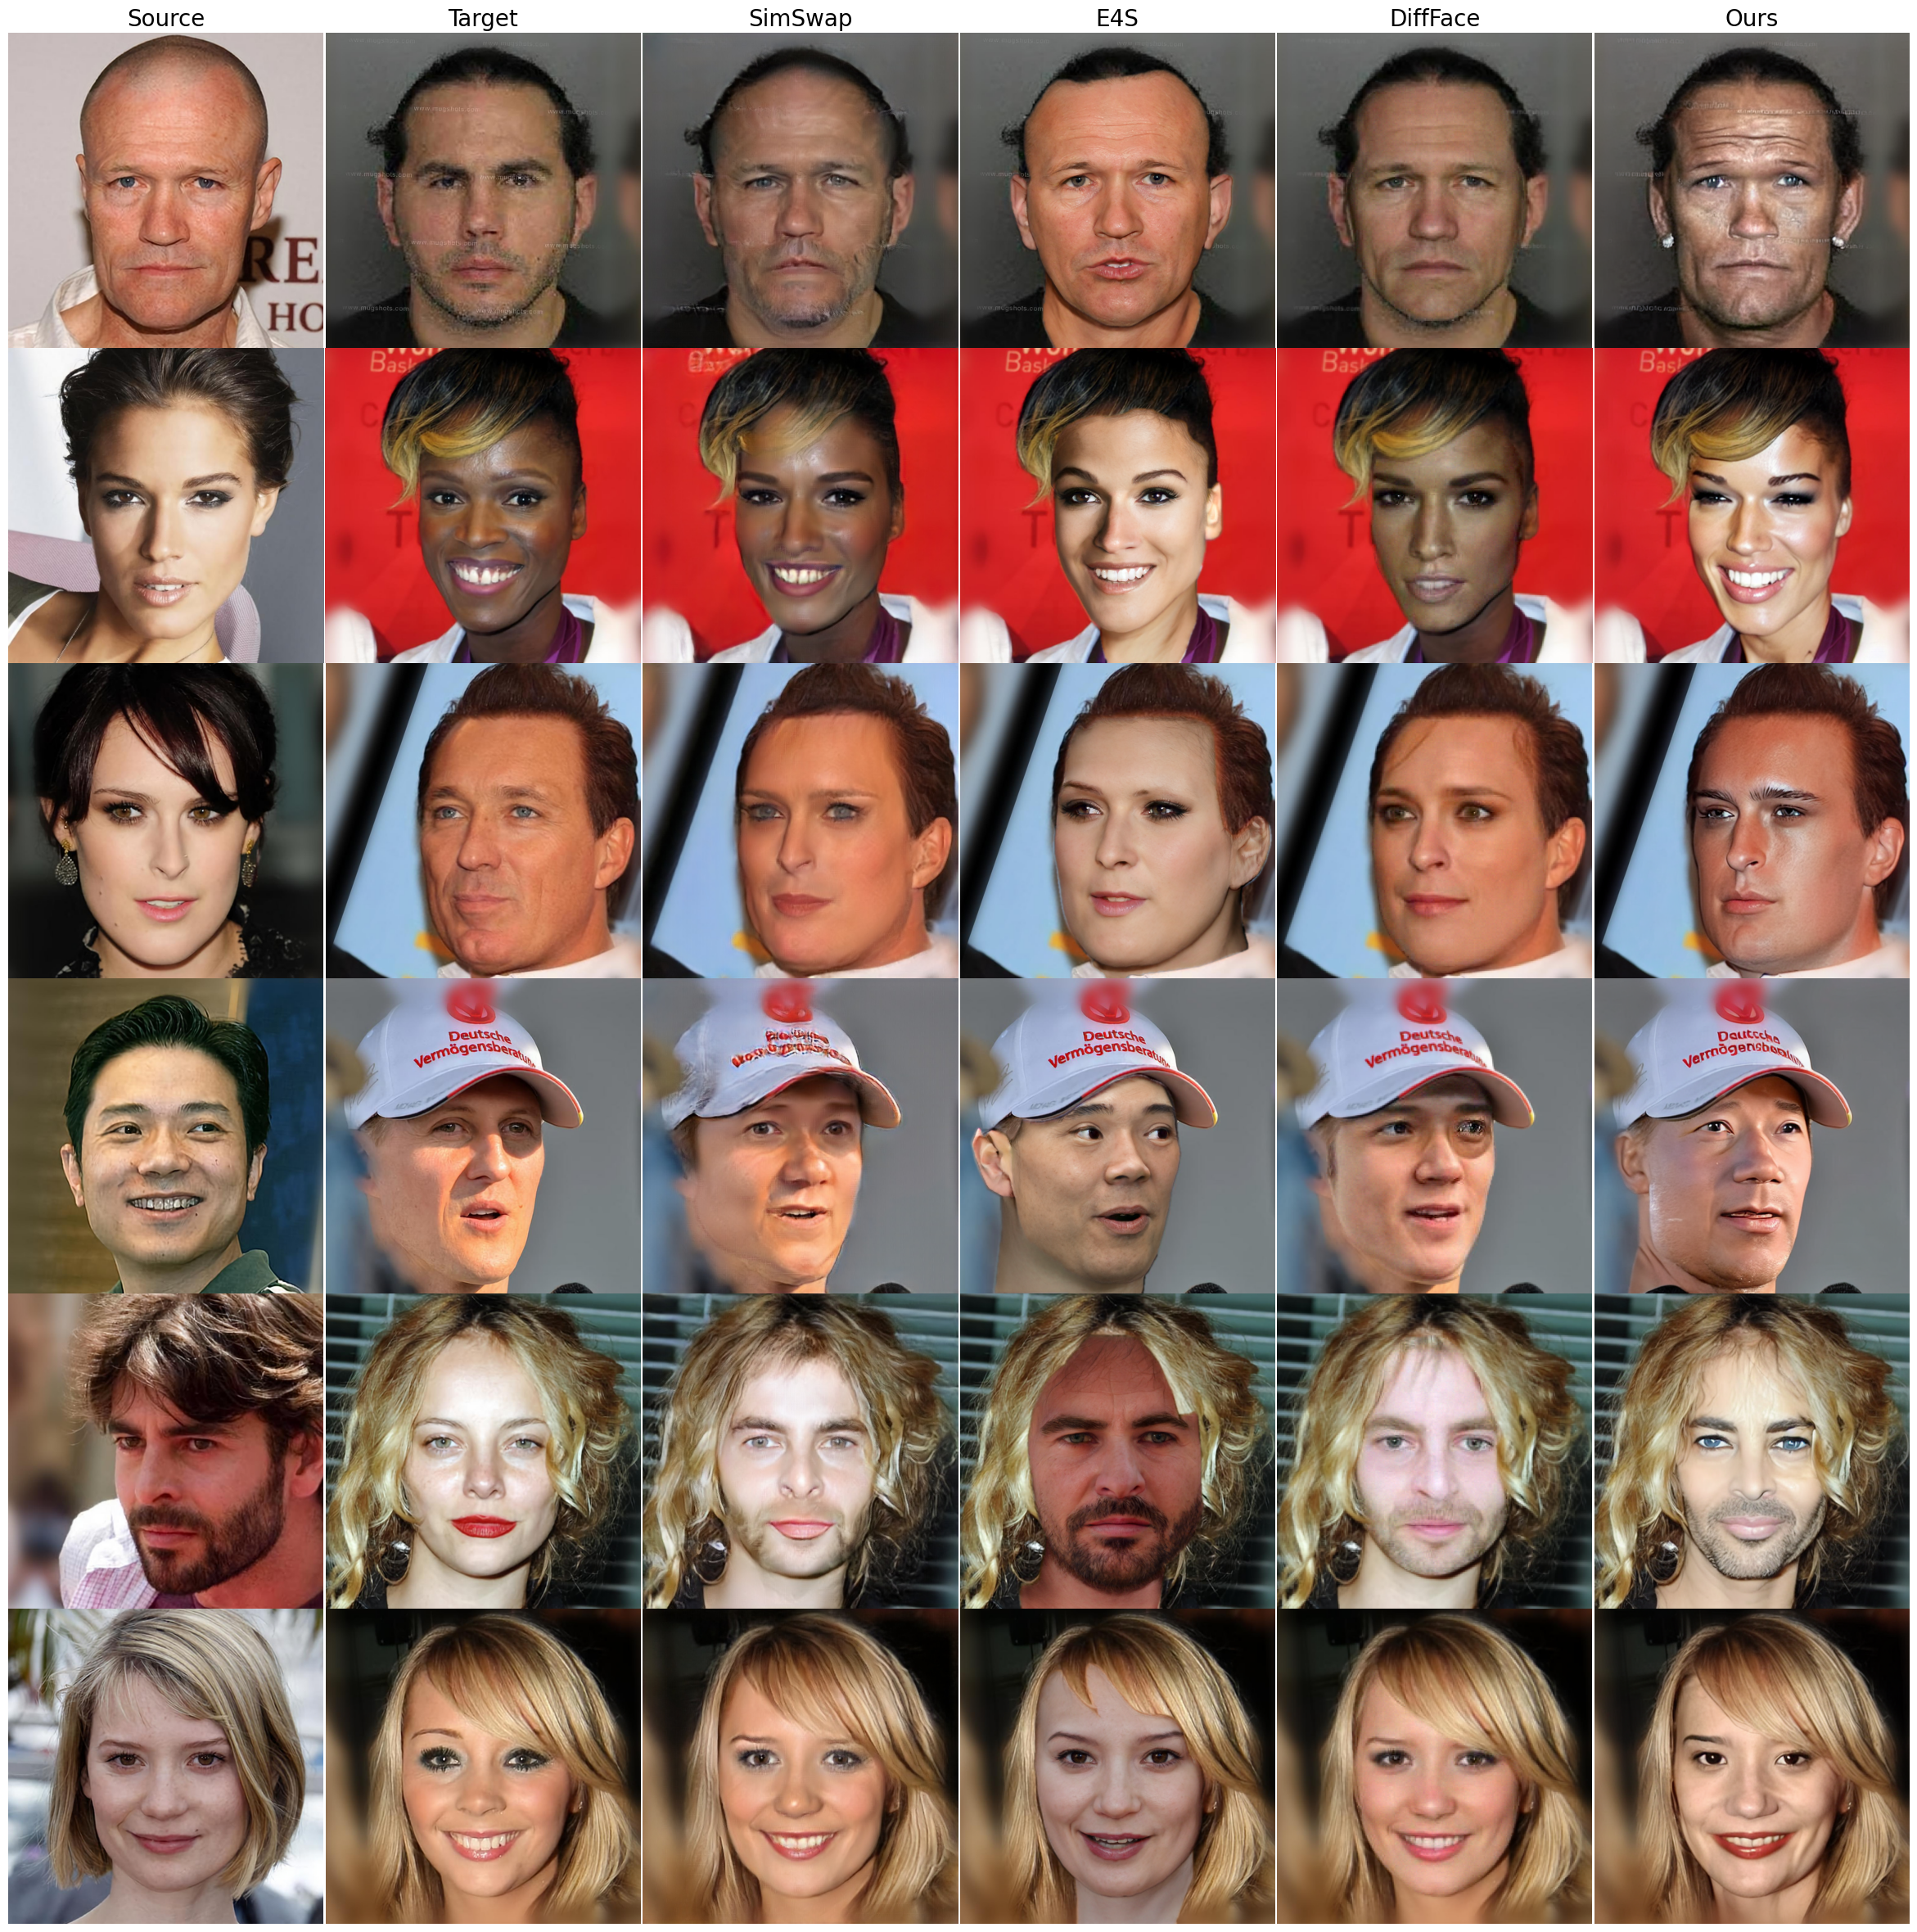

In [1]:
Simswap_path="/home/sanoojan/other_swappers/SimSwap/output/CelebA/results"
e4s_path="/home/sanoojan/e4s/Results/testbench/results_Original_ckpt_without_crop/results"
DiffFace_path="/home/sanoojan/other_swappers/DiffFace/results/CelebA/results"
# ours_path="results_grad/v4_reconstruct_img_train_2_step_multi_false_with_LPIPS_ep16_with_src_hair/results"
ours_path="results_grad/50_v4_reconstruct_img_train_2_step_multi_false_with_LPIPS_noclip_same_image_ep20/results"
src_path="dataset/FaceData/CelebAMask-HQ/Val"
target_path="dataset/FaceData/CelebAMask-HQ/Val_target"

# select_images=[3,7,25,31,32,64,69,81,82,88,102]
select_images=[7,24,32,64,69,81]
# select_images=[134,146,161,165,166,172]
# select_images=[3,7,25,31,32]
# select_images= [64,69,81,82,88,102]

path_list=[src_path,target_path,Simswap_path,e4s_path,DiffFace_path,ours_path]

Labels=["Source","Target","SimSwap","E4S","DiffFace","Ours"]

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import natsort

def read_images(path_list, select_images):
    images = []
    for path in path_list:
        filenames = os.listdir(path)
        filenames = natsort.natsorted(filenames)  # Sort filenames naturally
        selected_filenames = [filenames[i] for i in select_images]
        images.append([cv2.cvtColor(cv2.imread(os.path.join(path, filename)), cv2.COLOR_BGR2RGB) for filename in selected_filenames])
    return images

def visualize_images(images):
    num_paths = len(images)
    num_images_per_path = len(images[0])
    x_size=num_paths*5
    y_size=num_images_per_path*5
    fig, ax = plt.subplots(num_images_per_path, num_paths,figsize=(x_size, y_size))

    for i in range(num_images_per_path):
        for j in range(num_paths):
            ax[i, j].imshow(images[j][i])
            ax[i, j].axis('off')
            if i == 0:
                ax[i, j].set_title(Labels[j], fontsize=20)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

images = read_images(path_list, select_images)
visualize_images(images)

In [10]:
num_paths = len(images)
num_images_per_path = len(images[0])

In [11]:
num_paths

5

In [12]:
num_images_per_path

1